<a href="https://colab.research.google.com/github/MubasharSaeedPhD/IRIS_NN/blob/main/irisdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1 Steps of program to neural network
2 first we have to import some libraries
3 then we should have information regarding
dataset attributes
4

In [74]:
#image of neural netowrk


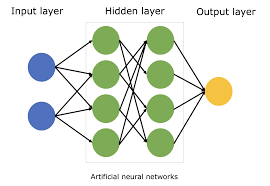

In [75]:
#first we have to import some libraries for IRIS image classifcation dataset
import torch
import torch.nn as nn #neural Network in Torch
import torch.nn.functional as F #for fucntions

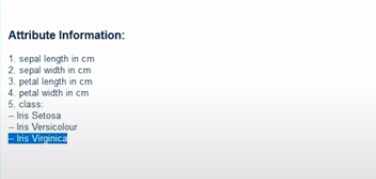

In [76]:
#Creating a class for making a model as displayed above in an image as we have 1 input layer 2 fully connected layers and 1 output layer
class Model(nn.Module):
  #inherit the module from nn and make a nn for image dataset as
  # we have input layer and 4 attributes
  #(According todataset image)--> hidden layer 1 --> hidden layer2-->
  #output(3 classes from dataset iris setosa, versicolour-- virginica)
  def __init__(self, in_features = 4, h1 = 8, h2 = 7, out_features = 3):#as we completed the structure
    super().__init__()  #instantiate our nn. Module
    self.fc1 =  nn.Linear(in_features,  h1) #creating fully connected layer start with h1 so out input should firt go to hidden layer 1
    self.fc2 = nn.Linear(h1, h2)# now from h1 to shiftting  the data into h2
    self.out = nn.Linear(h2, out_features)

#define a function which is responsible to move all these inputs to the model like a driver as we make a car now driver can move the car from one place to anoter
  def forward (self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x


In [77]:
# pick any random seed
torch.manual_seed(47)
model = Model() # this model is define on the class

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [79]:
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
my_df = pd.read_csv(url)

In [80]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [81]:
#now chage the charatcters into strings the last colom species
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)

In [82]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [83]:
#now split the dataset into training and test sets
# intraing X always be capital and it always be input and y is out put
# so first we have to drop the species set as its the results colom so we just split the data into traing and testing
# so first lets drop the last colom speicies
X= my_df.drop('species', axis =1)
y = my_df['species']


In [84]:
X # thats great so we droped the colom species

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [85]:
#now convert this data into numpy array
X = X.values
y = y.values

In [86]:
#now run the split data using sklearn
from sklearn.model_selection import train_test_split

In [87]:
# train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41) # our traing size is just 20%

In [88]:
# now convert X features to flot Tensors  like 5.9 3.0 5.2 1.8
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [89]:
# now convert y features to flot Tensors  like 5.9 3.0 5.2 1.8
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [90]:
# now set a variable for a model to measure the erro criterion is the name of the varialbe we use here
criterion = nn.CrossEntropyLoss()
# chose teh opitmizer which send the data again and again so here we use Adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)
#model parameters are Fc1 Fc2 Fc3 which we define up in our model


In [91]:
# you can check the model parametsrs
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=7, bias=True)
  (out): Linear(in_features=7, out_features=3, bias=True)
)>

In [92]:
#Now train the mode we need epochs
epochs = 100
# now we have to create python list to check the losses after each 10 ephochs regarding our learing
losses = []
for i in range(epochs):
  y_pred = model.forward(X_train) # get predicted results
  #measure the loss
  loss = criterion(y_pred, y_train) #predicted values vs train value
  losses.append(loss.detach().numpy())
  if i % 10 ==0:
    print(f'Epoch: {i} and loss: {loss}')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 and loss: 1.2056821584701538
Epoch: 10 and loss: 1.182811975479126
Epoch: 20 and loss: 1.1625897884368896
Epoch: 30 and loss: 1.1435478925704956
Epoch: 40 and loss: 1.1268647909164429
Epoch: 50 and loss: 1.1130638122558594
Epoch: 60 and loss: 1.1036525964736938
Epoch: 70 and loss: 1.0988447666168213
Epoch: 80 and loss: 1.095150351524353
Epoch: 90 and loss: 1.0915641784667969


Text(0.5, 0, 'Epoch')

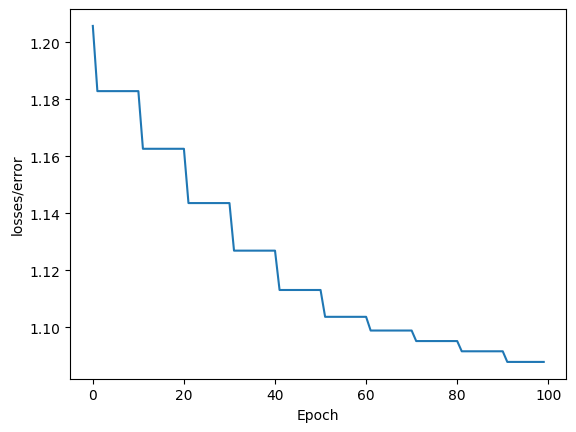

In [93]:
plt.plot(range(epochs), losses)
plt.ylabel("losses/error")
plt.xlabel("Epoch")

In [96]:
#evaluate the data set
with torch.no_grad(): # turn of the Backgpropgraiont
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)


In [97]:
loss

tensor(1.0827)

In [103]:
#now check the correct prediction of the our NN
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    print(f'{i+1}. {str(y_val)} \t {y_test[i]} \t{y_val.argmax().item()}')
    if y_val.argmax().item() == y_test[i]:
      correct +=1

  print(f'we got {correct} correct!')

1. tensor([-0.0880,  0.0857, -0.2015]) 	 2 	1
2. tensor([-0.0880,  0.0857, -0.2015]) 	 2 	1
3. tensor([-0.0880,  0.0857, -0.2015]) 	 2 	1
4. tensor([-0.0880,  0.0857, -0.2015]) 	 1 	1
5. tensor([-0.0880,  0.0857, -0.2015]) 	 2 	1
6. tensor([-0.0880,  0.0857, -0.2015]) 	 1 	1
7. tensor([-0.0880,  0.0857, -0.2015]) 	 2 	1
8. tensor([-0.0880,  0.0857, -0.2015]) 	 1 	1
9. tensor([-0.0880,  0.0857, -0.2015]) 	 2 	1
10. tensor([-0.0880,  0.0857, -0.2015]) 	 2 	1
11. tensor([-0.0880,  0.0857, -0.2015]) 	 2 	1
12. tensor([-0.0014,  0.0490, -0.1561]) 	 0 	1
13. tensor([ 0.0101,  0.0583, -0.1530]) 	 0 	1
14. tensor([-0.0686,  0.0771, -0.1911]) 	 1 	1
15. tensor([ 0.0024,  0.0511, -0.1556]) 	 0 	1
16. tensor([-0.0880,  0.0857, -0.2015]) 	 2 	1
17. tensor([-1.5255e-04,  4.9700e-02, -1.5591e-01]) 	 0 	1
18. tensor([-0.0880,  0.0857, -0.2015]) 	 1 	1
19. tensor([ 0.0006,  0.0501, -0.1558]) 	 0 	1
20. tensor([ 0.0219,  0.0765, -0.1449]) 	 0 	1
21. tensor([-0.0819,  0.0830, -0.1982]) 	 1 	1
22. tensor

In [104]:
#save our mode
torch.save(model.state_dict(), 'myfirstModel.pt')

In [106]:
#now how to load the mode
new_model = Model()
new_model.load_state_dict(torch.load('myfirstModel.pt'))

<All keys matched successfully>

In [107]:
new_model.eval

<bound method Module.eval of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=7, bias=True)
  (out): Linear(in_features=7, out_features=3, bias=True)
)>